In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers, models
import matplotlib.pyplot as plt


In [2]:
(X_train,y_train), (X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 94s 1us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [9]:
y_test.shape

(10000, 1)

In [6]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

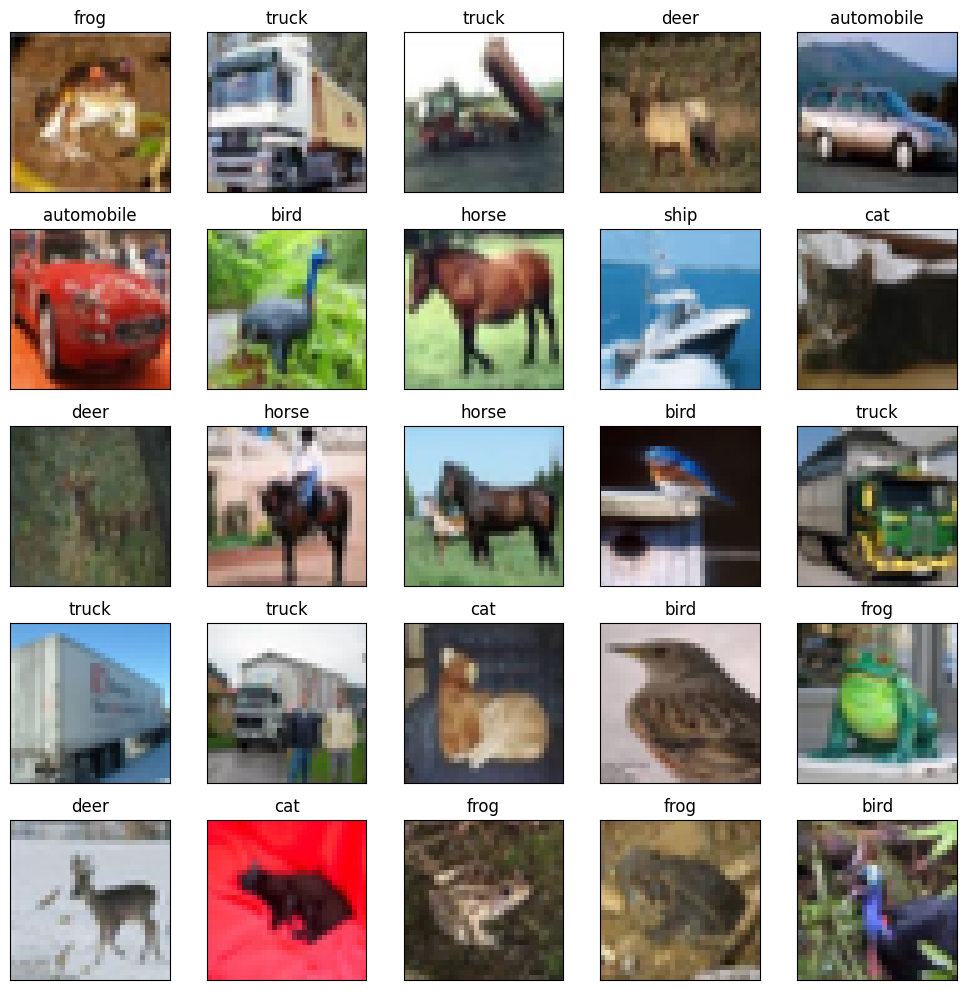

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Display first 16 images from the training dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    # Show label as title
    plt.title(class_names[y_train[i][0]])
plt.tight_layout()
plt.show()

In [10]:
from tensorflow.keras import datasets, layers, models
model = models.Sequential()

model.add(layers.Conv2D(32,
                        (3,3),
                        activation='relu',
                        input_shape=(32,32,3)
                        ))

model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,
                        (3,3),
                        activation='relu'))

model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,
                        (3,3),
                        activation='relu'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history =  model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.2961 - loss: 2.3811 - val_accuracy: 0.4609 - val_loss: 1.4960
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.5064 - loss: 1.3695 - val_accuracy: 0.5126 - val_loss: 1.3579
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5694 - loss: 1.2023 - val_accuracy: 0.5941 - val_loss: 1.1604
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6156 - loss: 1.0937 - val_accuracy: 0.6138 - val_loss: 1.1128
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6531 - loss: 0.9874 - val_accuracy: 0.6194 - val_loss: 1.1122
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6754 - loss: 0.9333 - val_accuracy: 0.6520 - val_loss: 1.0330
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6963 - loss: 0.8714 - val_accuracy: 0.6480 - val_loss: 1.0380
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7180 - loss: 0.8081 - val_ac

In [16]:
history.history

{'accuracy': [0.381879985332489,
  0.5214200019836426,
  0.5788400173187256,
  0.6185600161552429,
  0.6467800140380859,
  0.6740999817848206,
  0.6924200057983398,
  0.7123399972915649,
  0.7246599793434143,
  0.7394400238990784],
 'loss': [1.7594048976898193,
  1.341316819190979,
  1.1869879961013794,
  1.0871809720993042,
  1.005141019821167,
  0.9385045170783997,
  0.8826975226402283,
  0.8254427909851074,
  0.7865996956825256,
  0.7456565499305725],
 'val_accuracy': [0.4609000086784363,
  0.5126000046730042,
  0.5940999984741211,
  0.6137999892234802,
  0.6194000244140625,
  0.6520000100135803,
  0.6480000019073486,
  0.6542999744415283,
  0.6575999855995178,
  0.6352999806404114],
 'val_loss': [1.4959746599197388,
  1.3579130172729492,
  1.160369873046875,
  1.1128382682800293,
  1.1121826171875,
  1.0330052375793457,
  1.0379819869995117,
  1.065271019935608,
  1.0509755611419678,
  1.1178884506225586]}

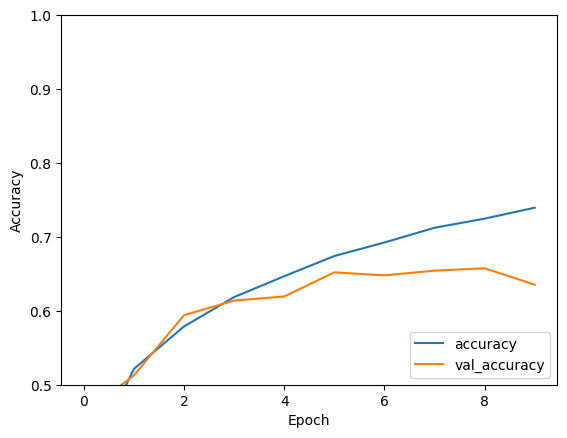

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


plt.show()


In [21]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print(test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.6353 - loss: 1.1179
0.6352999806404114


In [22]:
test_acc

0.6352999806404114

In [23]:
import numpy as np

# Assuming 'model' and 'X_test', 'y_test' are defined from the previous code
predictions = model.predict(X_test)

# Get the predicted class index for each image
predicted_classes = np.argmax(predictions, axis=1)

# Get max probabilities
max_probabilities = np.max(predictions, axis=1)

# Display results for each image
for i in range(len(X_test)):
    max_proba = max_probabilities[i]
    index = i
    prediction_class = class_names[predicted_classes[i]]
    ground_truth_class = class_names[y_test[i][0]]
    output = "Match" if prediction_class == ground_truth_class else "Mismatch"

    print(f"Image Index: {index}")
    print(f"Max Probability: {max_proba}")
    print(f"Predicted Class: {prediction_class}")
    print(f"Ground Truth Class: {ground_truth_class}")
    print(f"Output: {output}")
    print("-" * 20)


Streaming output truncated to the last 5000 lines.
Output: Match
--------------------
Image Index: 9167
Max Probability: 0.7741246223449707
Predicted Class: horse
Ground Truth Class: horse
Output: Match
--------------------
Image Index: 9168
Max Probability: 0.9851391911506653
Predicted Class: bird
Ground Truth Class: bird
Output: Match
--------------------
Image Index: 9169
Max Probability: 0.8738729357719421
Predicted Class: airplane
Ground Truth Class: automobile
Output: Mismatch
--------------------
Image Index: 9170
Max Probability: 0.8484464883804321
Predicted Class: airplane
Ground Truth Class: airplane
Output: Match
--------------------
Image Index: 9171
Max Probability: 0.5886974334716797
Predicted Class: bird
Ground Truth Class: bird
Output: Match
--------------------
Image Index: 9172
Max Probability: 0.9977541565895081
Predicted Class: airplane
Ground Truth Class: airplane
Output: Match
--------------------
Image Index: 9173
Max Probability: 0.3982533812522888
Predicted Cla

In [26]:
import pandas as pd

data = {
    'Image Index': list(range(len(X_test))),
    'Max Probability': max_probabilities,
    'Predicted Class': [class_names[i] for i in predicted_classes],
    'Ground Truth Class': [class_names[y_test[i][0]] for i in range(len(y_test))],
    'Output': ['1' if class_names[predicted_classes[i]] == class_names[y_test[i][0]] else '0' for i in range(len(y_test))]
}

df = pd.DataFrame(data)
df


,Image Index,Max Probability,Predicted Class,Ground Truth Class,Output
0,0,0.785354,cat,cat,1
1,1,0.951167,ship,ship,1
2,2,0.312447,airplane,ship,0
3,3,0.528055,airplane,airplane,1
4,4,0.510838,deer,frog,0
...,...,...,...,...,...
9995,9995,0.680797,cat,ship,0
9996,9996,0.602618,frog,cat,0
9997,9997,0.539346,dog,dog,1
9998,9998,0.402768,automobile,automobile,1


In [27]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1Z0V6uINaB7CDCdKWU387qidaaqk115-sQTDXmTkZwis/edit#gid=0
